# COVID-19 COMMUNITY MOBILITY REPORT FOR THE NETHERLANDS

#### Google LLC "Google COVID-19 Community Mobility Reports.
#### https://www.google.com/covid19/mobility/    Accessed: 01/05/2020

### Mobility Report Documentation

This dataset is intended to help remediate the impact of COVID-19. It shouldn’t be used for medical diagnostic, prognostic, or treatment purposes. It also isn’t intended to be used for guidance on personal travel plans.

Each Community Mobility Report dataset is presented by location and highlights the percent change in visits to places like grocery stores and parks within a geographic area.

Location accuracy and the understanding of categorized places varies from region to region, so we don’t recommend using this data to compare changes between countries, or between regions with different characteristics (e.g. rural versus urban areas).

We’ll leave a region or category out of the dataset if we don’t have sufficient statistically significant levels of data.

## A. PROCESSING THE DATA

### A.1. Importing the relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### A.2. Scrapping the Dataset

In [2]:
URL="https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv"
df=pd.read_csv(URL, low_memory=False) 
#df=pd.read_csv('Global_Mobility_Report.csv', low_memory=False) 

### A.3. Cleaning and Manipulating Data

In [3]:
df=df[df.country_region_code=='NL']
df['date'] =  pd.to_datetime(df['date'])
df.set_index(pd.DatetimeIndex(df['date']), inplace=True)
df.tail()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
date,,,,,,,,,,,,,
2020-07-08,NL,Netherlands,Zeeland,NaN,NL-ZE,NaN,2020-07-08,55.0,40.0,351.0,-11.0,-22.0,5.0
2020-07-09,NL,Netherlands,Zeeland,NaN,NL-ZE,NaN,2020-07-09,48.0,39.0,324.0,-9.0,-24.0,6.0
2020-07-10,NL,Netherlands,Zeeland,NaN,NL-ZE,NaN,2020-07-10,37.0,30.0,370.0,-5.0,-22.0,4.0
2020-07-11,NL,Netherlands,Zeeland,NaN,NL-ZE,NaN,2020-07-11,31.0,35.0,370.0,35.0,13.0,1.0
2020-07-12,NL,Netherlands,Zeeland,NaN,NL-ZE,NaN,2020-07-12,81.0,53.0,411.0,74.0,15.0,-1.0


In [4]:
df.shape


(1937, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1937 entries, 2020-02-15 to 2020-07-12
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 1937 non-null   object        
 1   country_region                                      1937 non-null   object        
 2   sub_region_1                                        1788 non-null   object        
 3   sub_region_2                                        0 non-null      object        
 4   iso_3166_2_code                                     1788 non-null   object        
 5   census_fips_code                                    0 non-null      float64       
 6   date                                                1937 non-null   datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  1937 non-null   float64   

In [6]:
df.isnull().sum()

country_region_code                                      0
country_region                                           0
sub_region_1                                           149
sub_region_2                                          1937
iso_3166_2_code                                        149
census_fips_code                                      1937
date                                                     0
retail_and_recreation_percent_change_from_baseline       0
grocery_and_pharmacy_percent_change_from_baseline        0
parks_percent_change_from_baseline                      23
transit_stations_percent_change_from_baseline            0
workplaces_percent_change_from_baseline                  0
residential_percent_change_from_baseline                 0
dtype: int64

In [7]:
df.drop('sub_region_2',1,inplace=True)

In [8]:
null_columns=df.columns[df.isnull().any()]
print(df[df.isnull().any(axis=1)][null_columns].head(63)) #The null values

           sub_region_1  ... parks_percent_change_from_baseline
date                     ...                                   
2020-02-15          NaN  ...                               11.0
2020-02-16          NaN  ...                              -31.0
2020-02-17          NaN  ...                                8.0
2020-02-18          NaN  ...                               21.0
2020-02-19          NaN  ...                               20.0
...                 ...  ...                                ...
2020-04-13          NaN  ...                               14.0
2020-04-14          NaN  ...                               16.0
2020-04-15          NaN  ...                               47.0
2020-04-16          NaN  ...                               43.0
2020-04-17          NaN  ...                               38.0

[63 rows x 4 columns]


In [9]:
list(df)

['country_region_code',
 'country_region',
 'sub_region_1',
 'iso_3166_2_code',
 'census_fips_code',
 'date',
 'retail_and_recreation_percent_change_from_baseline',
 'grocery_and_pharmacy_percent_change_from_baseline',
 'parks_percent_change_from_baseline',
 'transit_stations_percent_change_from_baseline',
 'workplaces_percent_change_from_baseline',
 'residential_percent_change_from_baseline']

### A.4. Re-Arranging the DataFrame (df)

In [10]:
df.rename(columns={'sub_region_1': 'Province',
                   'retail_and_recreation_percent_change_from_baseline': 'Retail_and_Recreation', 
                   'grocery_and_pharmacy_percent_change_from_baseline':'Grocery_and_Pharmacy', 
                   'parks_percent_change_from_baseline':'Parks',
                   'transit_stations_percent_change_from_baseline': 'Transit_Stations',
                   'workplaces_percent_change_from_baseline':'Workplaces',
                   'residential_percent_change_from_baseline': 'Residences',
                   'date':'Date'},inplace=True)

In [11]:
df=df[['Date',
 'Province',
 'Retail_and_Recreation',
 'Grocery_and_Pharmacy',
 'Parks',
 'Transit_Stations',
 'Workplaces',
 'Residences']]

In [12]:
df.Province=df.Province.replace(np.nan, 'The Netherlands (General)')

In [13]:
df.Province.value_counts()

Gelderland                   149
Utrecht                      149
Flevoland                    149
Overijssel                   149
The Netherlands (General)    149
North Brabant                149
North Holland                149
Groningen                    149
Limburg                      149
Zeeland                      149
Drenthe                      149
South Holland                149
Friesland                    149
Name: Province, dtype: int64

In [14]:
df.head()

,Date,Province,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
date,,,,,,,,
2020-02-15,2020-02-15,The Netherlands (General),1.0,1.0,11.0,3.0,0.0,0.0
2020-02-16,2020-02-16,The Netherlands (General),-10.0,-8.0,-31.0,-5.0,-3.0,2.0
2020-02-17,2020-02-17,The Netherlands (General),0.0,-1.0,8.0,-3.0,-5.0,1.0
2020-02-18,2020-02-18,The Netherlands (General),5.0,4.0,21.0,-3.0,-5.0,1.0
2020-02-19,2020-02-19,The Netherlands (General),3.0,0.0,20.0,-3.0,-5.0,1.0


In [15]:
df.describe()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
count,1937.000000,1937.000000,1914.000000,1937.000000,1937.000000,1937.000000
mean,-19.315436,-3.244708,66.940439,-37.032008,-25.833764,9.161074
std,21.768911,11.621395,76.006414,23.960173,22.295611,6.333196
min,-81.000000,-73.000000,-59.000000,-82.000000,-88.000000,-2.000000
25%,-36.000000,-9.000000,15.000000,-55.000000,-42.000000,4.000000
50%,-19.000000,-3.000000,47.000000,-43.000000,-30.000000,9.000000
75%,-2.000000,3.000000,97.000000,-20.000000,-4.000000,14.000000
max,81.000000,53.000000,479.000000,74.000000,31.000000,28.000000


### A.5. Setting a new Genral DataFrame(df_NL)

In [16]:
df_NL=df[df.Province=='The Netherlands (General)']

In [17]:
df_NL.describe()

,Retail_and_Recreation,Grocery_and_Pharmacy,Parks,Transit_Stations,Workplaces,Residences
count,149.000000,149.000000,149.000000,149.00000,149.000000,149.000000
mean,-21.845638,-4.087248,54.221477,-40.95302,-26.624161,9.590604
std,19.068413,9.416011,53.950534,20.81428,21.980174,6.475540
min,-71.000000,-51.000000,-31.000000,-75.00000,-85.000000,-1.000000
25%,-37.000000,-9.000000,13.000000,-56.00000,-44.000000,4.000000
50%,-21.000000,-3.000000,40.000000,-46.00000,-31.000000,9.000000
75%,-4.000000,1.000000,86.000000,-33.00000,-5.000000,15.000000
max,16.000000,24.000000,248.000000,10.00000,24.000000,27.000000


## B. Retail & Recreation

__Mobility trends for places like restaurants, cafes, shopping centers, theme parks, museums, libraries, and movie theaters.__

### B.1. The General Trend of Mobility in Retail and Recreation in the Netherlands 

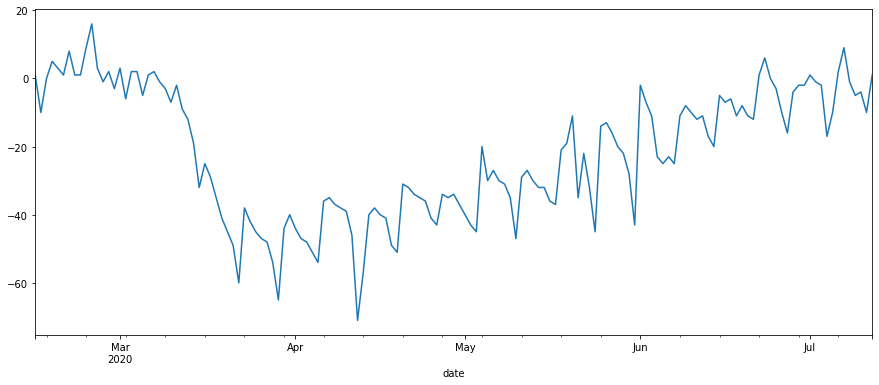

In [18]:
df_NL['Retail_and_Recreation'].plot(figsize=(15,6))

### B.2. The Time Series Analysis by Provinces on the Mobility in Retail and Recreation 

[None, None]

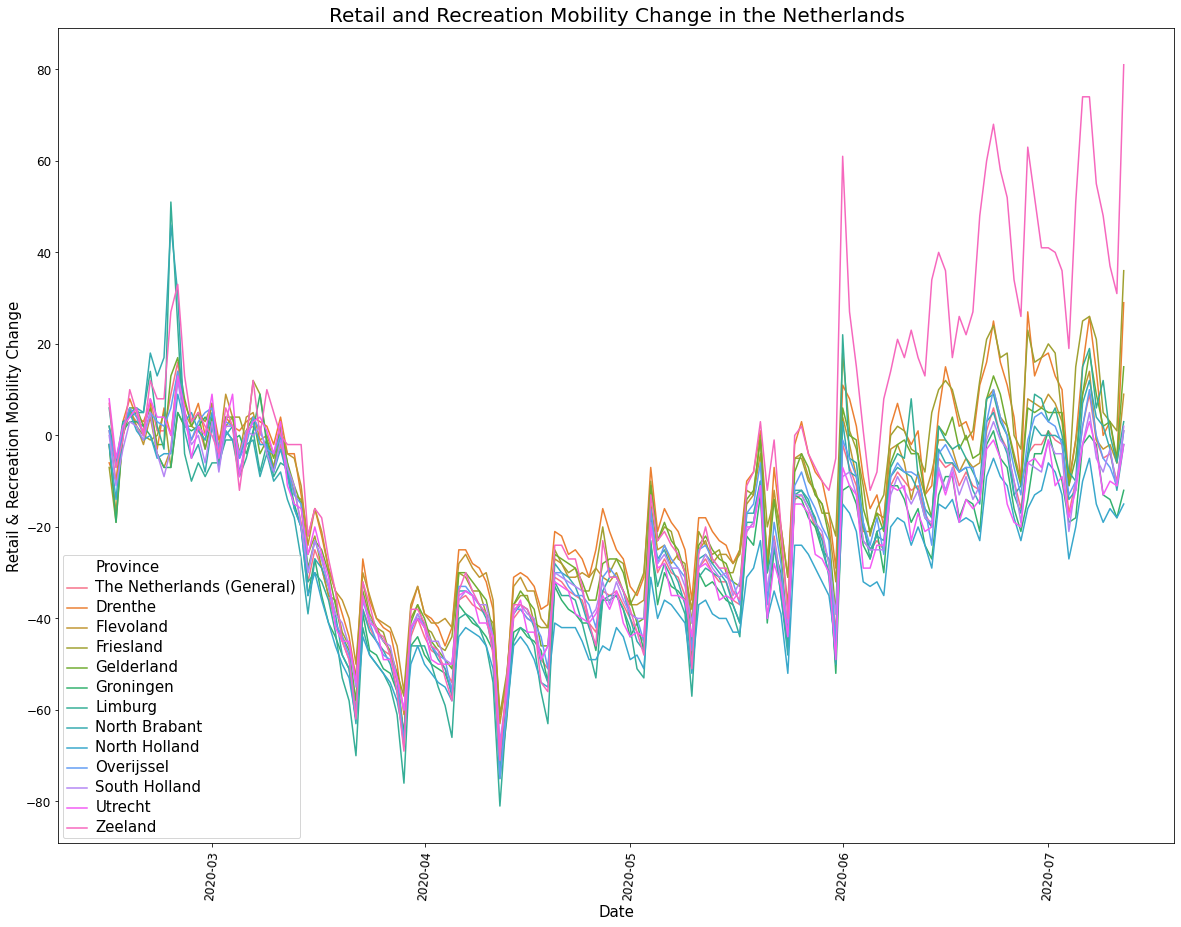

In [19]:
plt.figure(figsize=(20,15))
RR=sns.lineplot(x="Date", y="Retail_and_Recreation", hue='Province', data=df)
sns.set(style="whitegrid")
RR.axes.set_title("Retail and Recreation Mobility Change in the Netherlands",fontsize=20)
RR.set_xlabel("Date",fontsize=15)
RR.set_ylabel("Retail & Recreation Mobility Change",fontsize=15)
RR.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(RR.get_legend().get_texts(), fontsize='15')
plt.setp(RR.get_legend().get_title(), fontsize='15') 

### B.3. The Percentage Change by Provinces in the Mobility in Retail and Recreation

In [20]:
result_RR = df.groupby(["Province"])['Retail_and_Recreation'].aggregate(np.mean).reset_index().sort_values('Retail_and_Recreation', ascending=True)
result_RR['Retail_and_Recreation']=np.absolute(result_RR['Retail_and_Recreation'])
result_RR

,Province,Retail_and_Recreation
7,North Holland,28.590604
4,Groningen,25.000000
11,Utrecht,22.912752
5,Limburg,22.335570
10,The Netherlands (General),21.845638
9,South Holland,21.778523
6,North Brabant,21.369128
8,Overijssel,20.261745
3,Gelderland,17.275168
1,Flevoland,16.590604


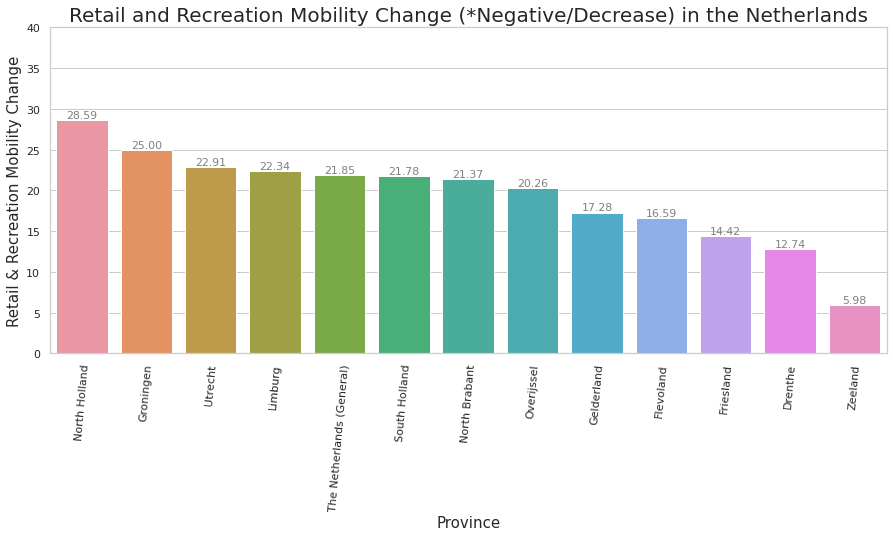

In [21]:
plt.figure(figsize=(15,6))
RR1=sns.barplot(x="Province", y="Retail_and_Recreation", data=result_RR)
sns.set(style="whitegrid")
RR1.axes.set_title("Retail and Recreation Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
RR1.set_xlabel("Province",fontsize=15)
RR1.set_ylabel("Retail & Recreation Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in RR1.patches:
             RR1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = RR1.set_ylim(0,40)

## C. Grocery & Pharmacy

__Mobility trends for places like grocery markets, food warehouses, farmers markets, specialty food shops, drug stores, and pharmacies.__

### C.1. The General Trend of Mobility in Grocery and Pharmacy in the Netherlands 

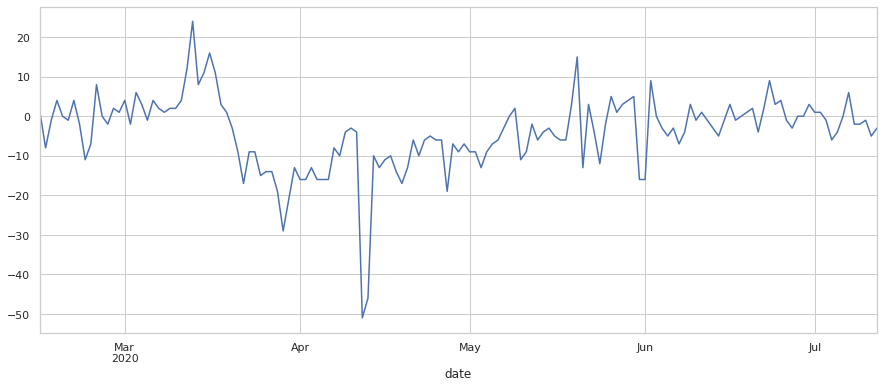

In [22]:
df_NL['Grocery_and_Pharmacy'].plot(figsize=(15,6))

### C.2. The Time Series Analysis by Provinces on the Mobility in Grocery and Pharmacy 

[None, None]

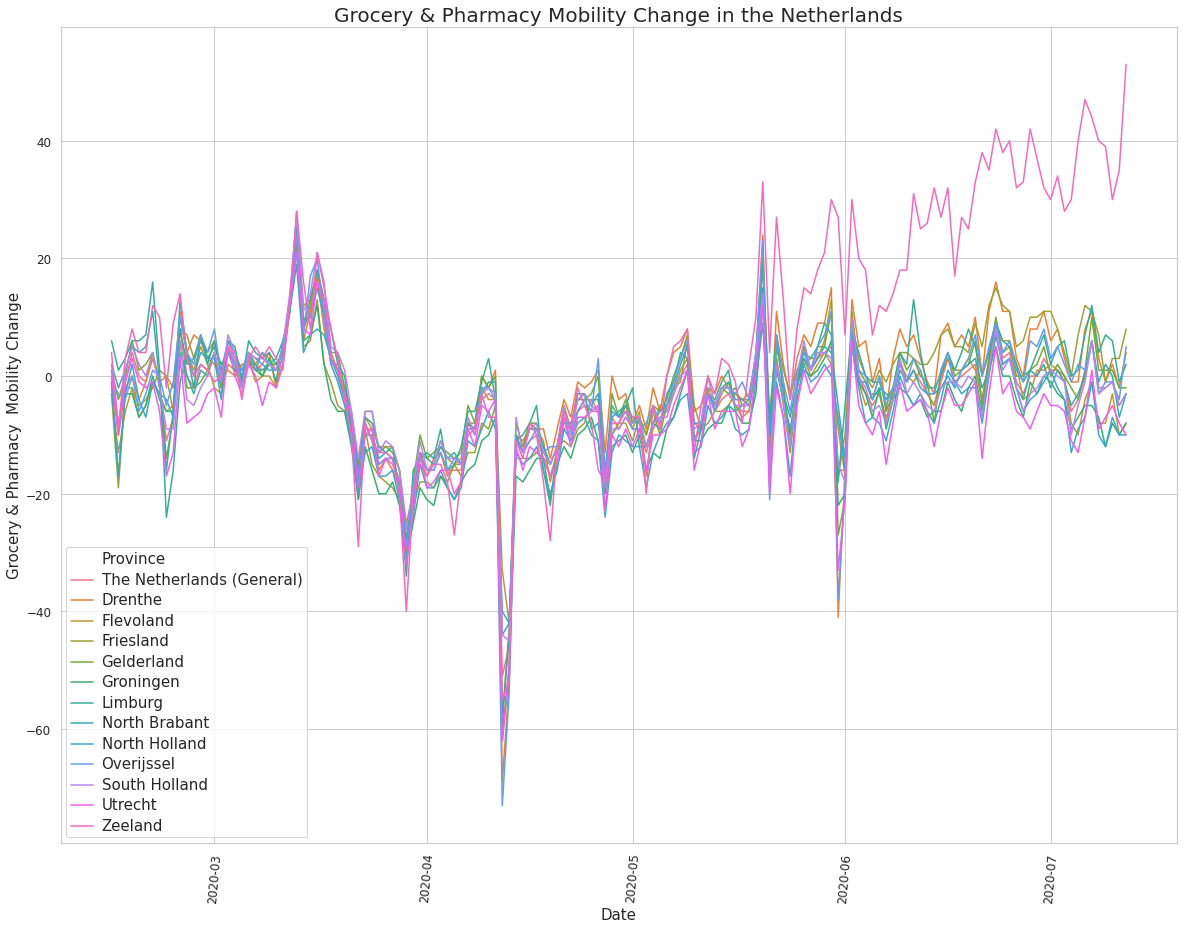

In [23]:
plt.figure(figsize=(20,15))
GP=sns.lineplot(x="Date", y="Grocery_and_Pharmacy", hue='Province', data=df)
sns.set(style="whitegrid")
GP.axes.set_title("Grocery & Pharmacy Mobility Change in the Netherlands",fontsize=20)
GP.set_xlabel("Date",fontsize=15)
GP.set_ylabel("Grocery & Pharmacy  Mobility Change",fontsize=15)
GP.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(GP.get_legend().get_texts(), fontsize='15')
plt.setp(GP.get_legend().get_title(), fontsize='15') 

### C.3. The Percentage Change by Provinces in the Mobility in Grocery and Pharmacy

In [24]:
result_GP = df.groupby(["Province"])['Grocery_and_Pharmacy'].aggregate(np.mean).reset_index().sort_values('Grocery_and_Pharmacy', ascending=True)
result_GP['Grocery_and_Pharmacy']=np.absolute(result_GP['Grocery_and_Pharmacy'])
result_GP

,Province,Grocery_and_Pharmacy
11,Utrecht,7.442953
4,Groningen,7.114094
7,North Holland,6.463087
1,Flevoland,4.093960
10,The Netherlands (General),4.087248
9,South Holland,3.738255
6,North Brabant,3.496644
8,Overijssel,3.134228
3,Gelderland,2.906040
2,Friesland,2.718121


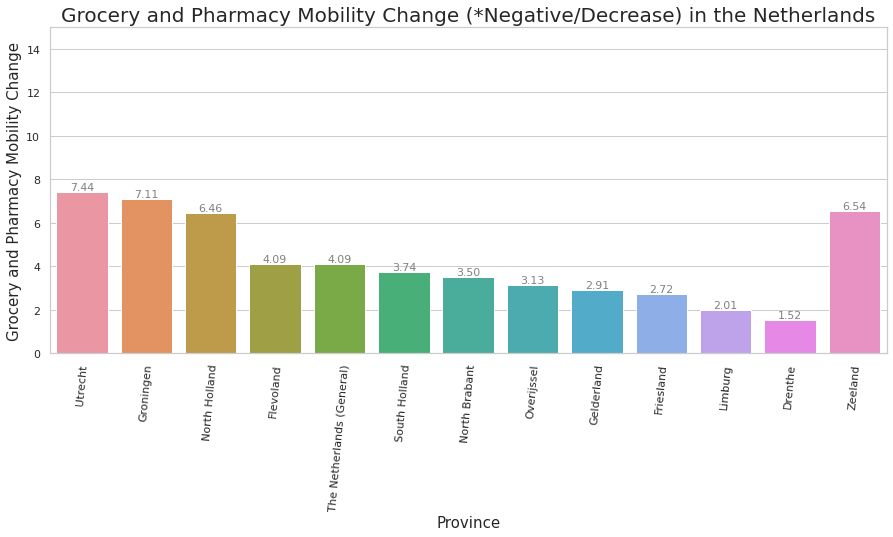

In [25]:
plt.figure(figsize=(15,6))
GP1=sns.barplot(x="Province", y="Grocery_and_Pharmacy", data=result_GP)
sns.set(style="whitegrid")
GP1.axes.set_title("Grocery and Pharmacy Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
GP1.set_xlabel("Province",fontsize=15)
GP1.set_ylabel("Grocery and Pharmacy Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in GP1.patches:
             GP1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = GP1.set_ylim(0,15)

## D.Parks

__Mobility trends for places like local parks, national parks, public beaches, marinas, dog parks, plazas, and public gardens.__

### D.1. The General Trend of Mobility in Parks in the Netherlands 

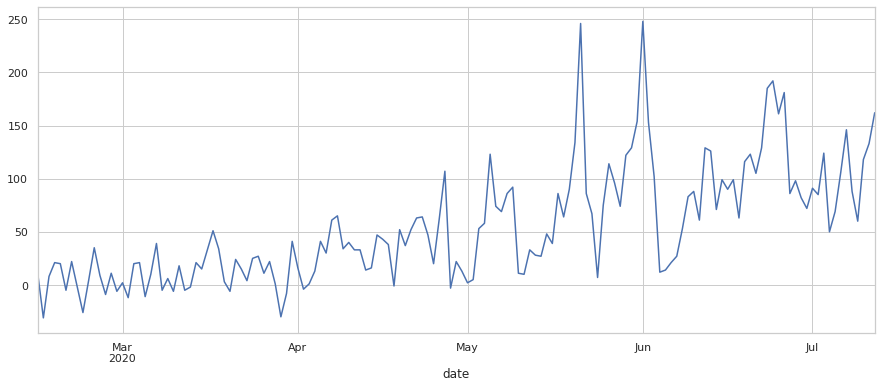

In [26]:
df_NL['Parks'].plot(figsize=(15,6))

### D.2. The Time Series Analysis by Provinces on the Mobility in Parks 

[None, None]

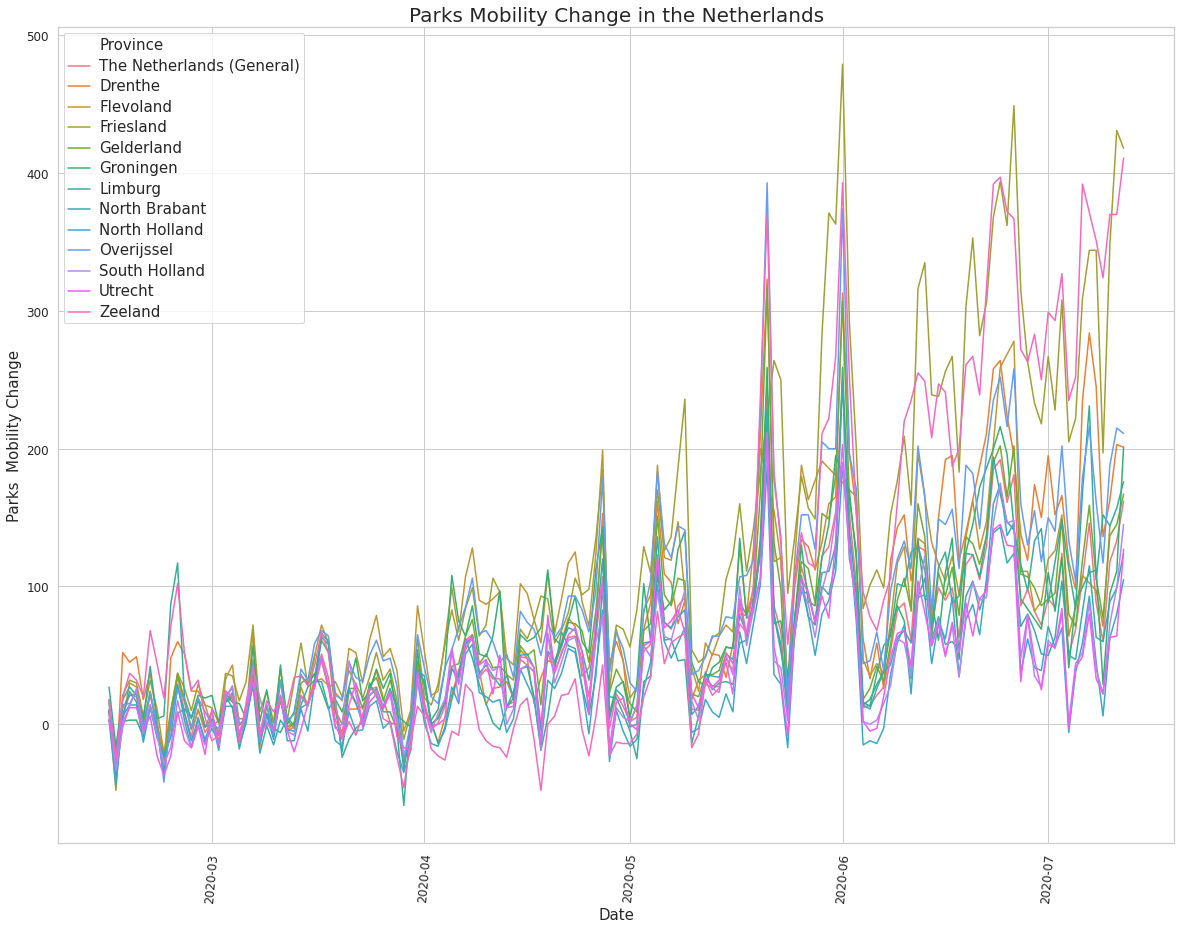

In [27]:
plt.figure(figsize=(20,15))
P=sns.lineplot(x="Date", y="Parks", hue='Province', data=df)
sns.set(style="whitegrid")
P.axes.set_title("Parks Mobility Change in the Netherlands",fontsize=20)
P.set_xlabel("Date",fontsize=15)
P.set_ylabel("Parks  Mobility Change",fontsize=15)
P.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(P.get_legend().get_texts(), fontsize='15')
plt.setp(P.get_legend().get_title(), fontsize='15') 

### D.3. The Percentage Change by Provinces in the Mobility in Parks

In [28]:
result_P = df.groupby(["Province"])['Parks'].aggregate(np.mean).reset_index().sort_values('Parks', ascending=False)
result_P

,Province,Parks
2,Friesland,129.952381
12,Zeeland,97.608108
8,Overijssel,89.671141
0,Drenthe,77.844595
1,Flevoland,74.573529
3,Gelderland,65.382550
4,Groningen,61.643357
5,Limburg,55.906040
10,The Netherlands (General),54.221477
6,North Brabant,47.684564


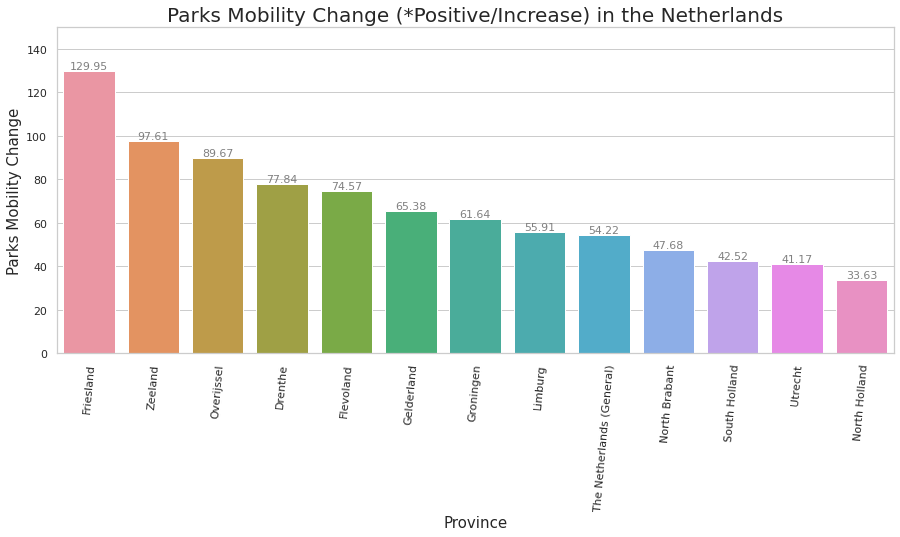

In [42]:
plt.figure(figsize=(15,6))
P1=sns.barplot(x="Province", y="Parks", data=result_P)
sns.set(style="whitegrid")
P1.axes.set_title("Parks Mobility Change (*Positive/Increase) in the Netherlands", fontsize=20)
P1.set_xlabel("Province",fontsize=15)
P1.set_ylabel("Parks Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in P1.patches:
             P1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = P1.set_ylim(0,150)

## E. Transit Stations

__Mobility trends for places like public transport hubs such as subway, bus, and train stations.__

### E.1. The General Trend of Mobility in Transit Stations in the Netherlands 

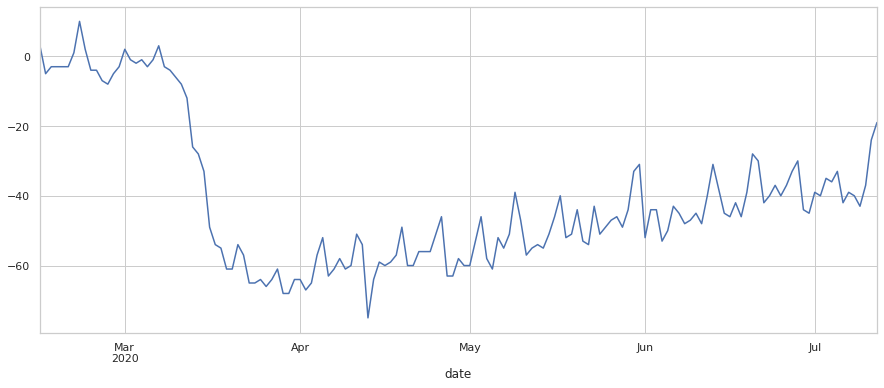

In [30]:
df_NL['Transit_Stations'].plot(figsize=(15,6))

### E.2. The Time Series Analysis by Provinces on the Mobility in Transit Stations 

[None, None]

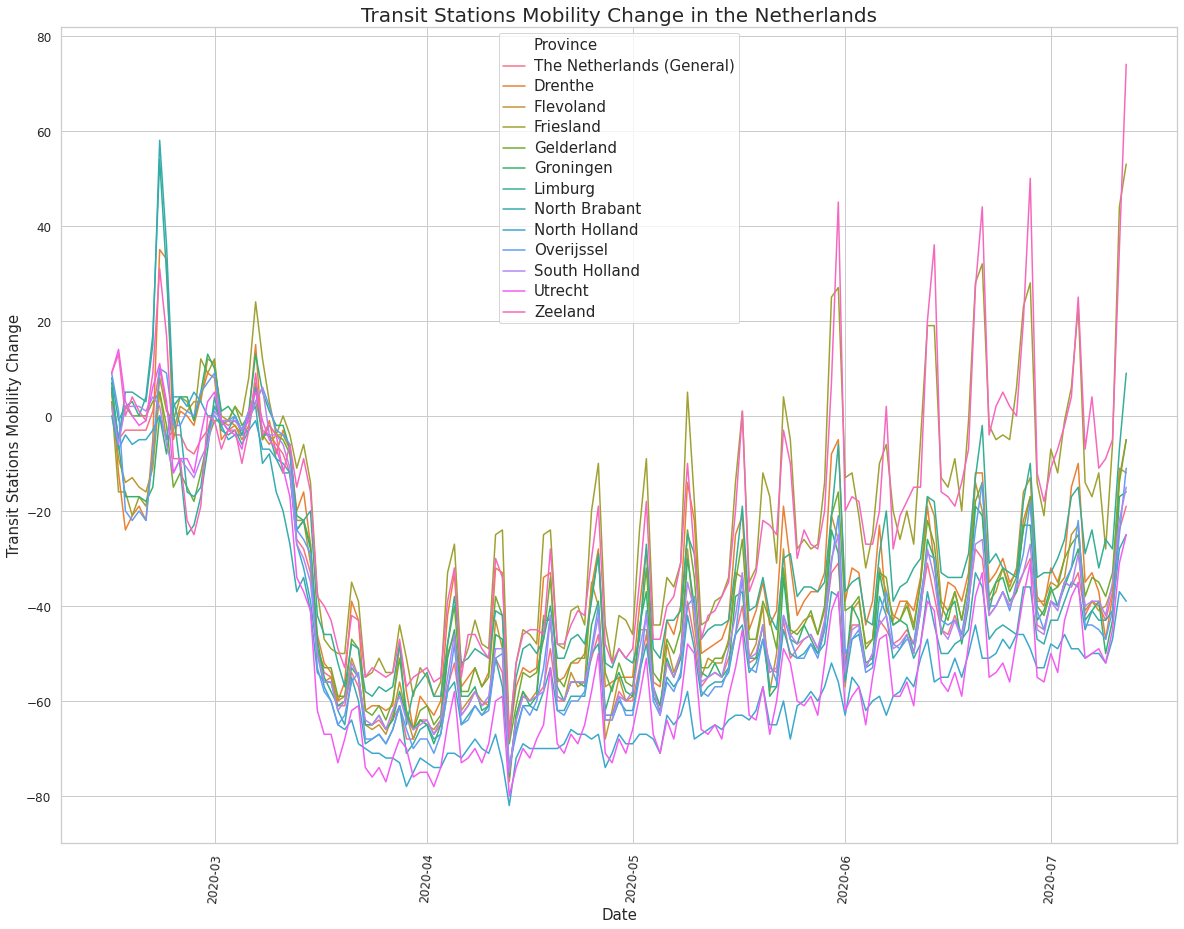

In [31]:
plt.figure(figsize=(20,15))
T=sns.lineplot(x="Date", y="Transit_Stations", hue='Province', data=df)
sns.set(style="whitegrid")
T.axes.set_title("Transit Stations Mobility Change in the Netherlands",fontsize=20)
T.set_xlabel("Date",fontsize=15)
T.set_ylabel("Transit Stations Mobility Change",fontsize=15)
T.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(T.get_legend().get_texts(), fontsize='15')
plt.setp(T.get_legend().get_title(), fontsize='15') 

### E.3. The Percentage Change by Provinces in the Mobility in Transit Stations

In [32]:
result_T = df.groupby(["Province"])['Transit_Stations'].aggregate(np.mean).reset_index().sort_values('Transit_Stations', ascending=True)
result_T['Transit_Stations']=np.absolute(result_T['Transit_Stations'])
result_T

,Province,Transit_Stations
7,North Holland,50.389262
11,Utrecht,48.308725
6,North Brabant,42.805369
10,The Netherlands (General),40.953020
8,Overijssel,40.872483
9,South Holland,40.328859
4,Groningen,38.986577
1,Flevoland,37.778523
3,Gelderland,36.140940
0,Drenthe,33.241611


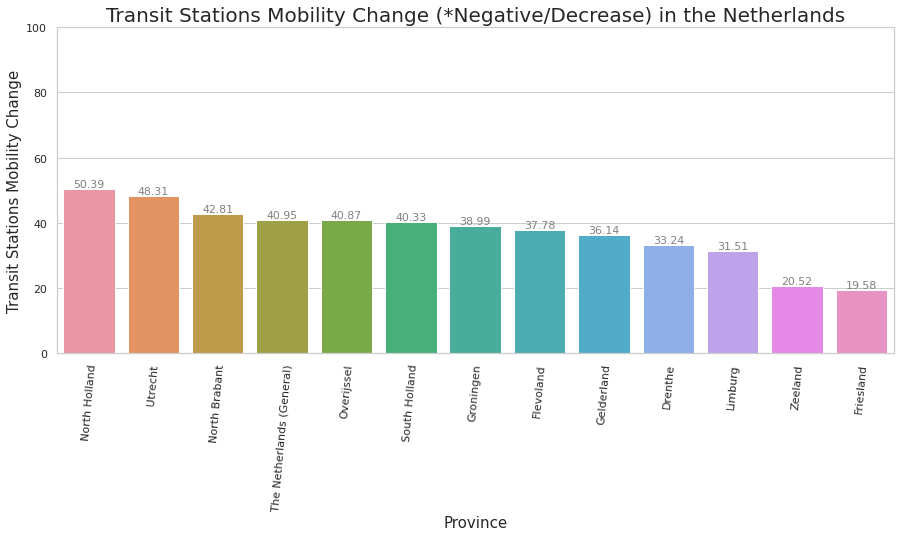

In [33]:
plt.figure(figsize=(15,6))
T1=sns.barplot(x="Province", y="Transit_Stations", data=result_T)
sns.set(style="whitegrid")
T1.axes.set_title("Transit Stations Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
T1.set_xlabel("Province",fontsize=15)
T1.set_ylabel("Transit Stations Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in T1.patches:
             T1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = T1.set_ylim(0,100)

## F. Workplaces

__Mobility trends for places of work.__

### F.1. The General Trend of Mobility in Workplaces in the Netherlands 

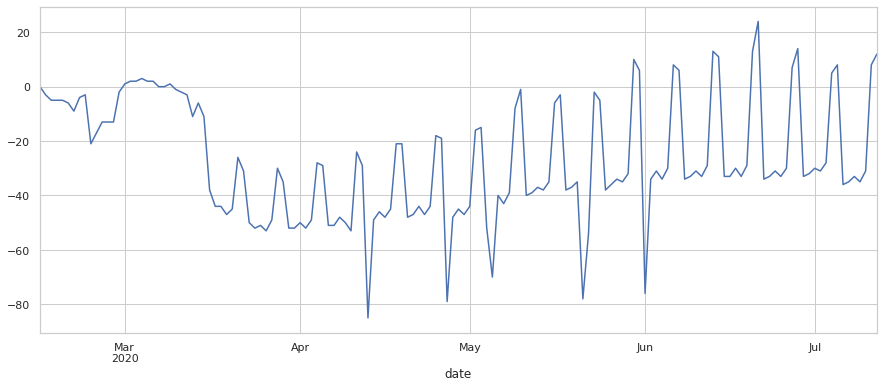

In [34]:
df_NL['Workplaces'].plot(figsize=(15,6))

### F.2. The Time Series Analysis by Provinces on the Mobility in Workplaces 

[None, None]

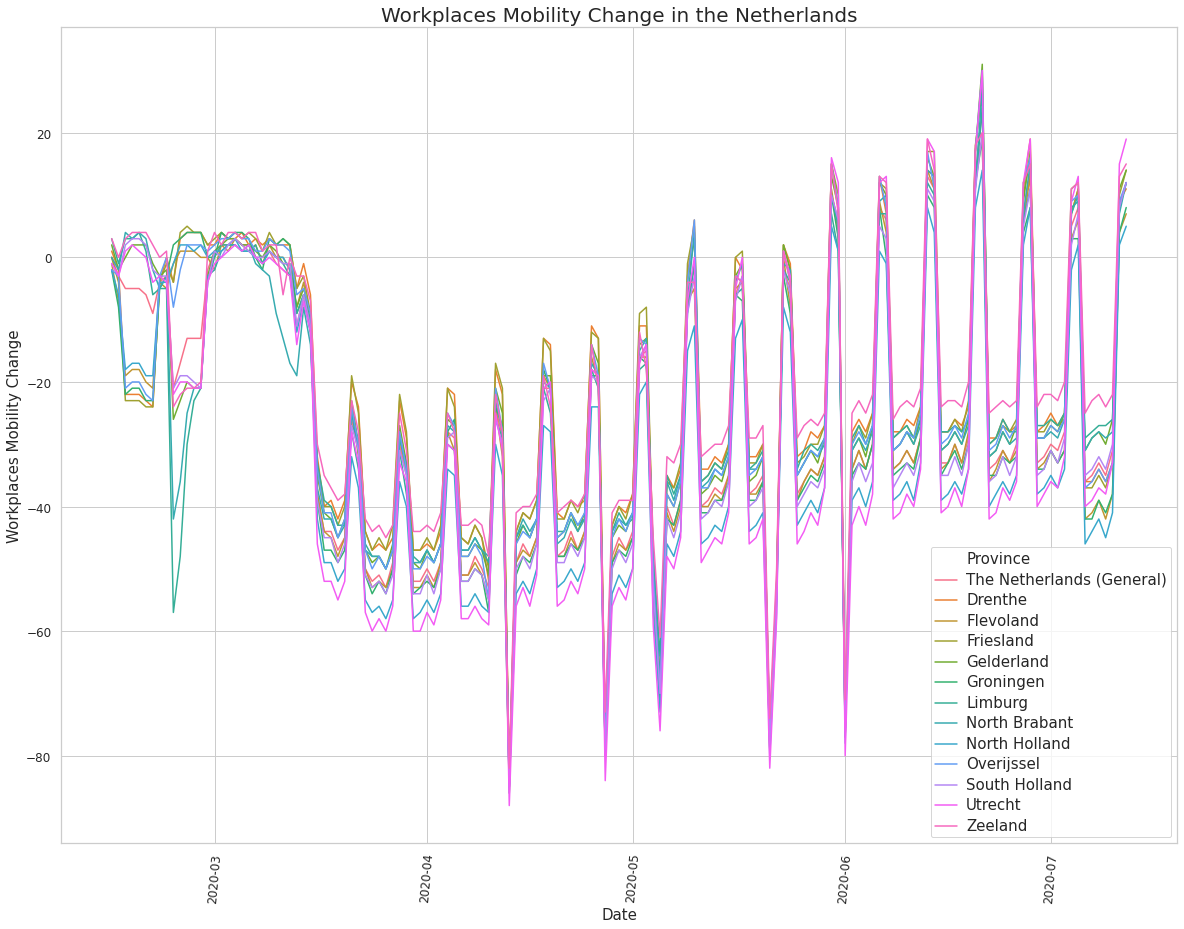

In [35]:
plt.figure(figsize=(20,15))
W=sns.lineplot(x="Date", y="Workplaces", hue='Province', data=df)
sns.set(style="whitegrid")
W.axes.set_title("Workplaces Mobility Change in the Netherlands",fontsize=20)
W.set_xlabel("Date",fontsize=15)
W.set_ylabel("Workplaces Mobility Change",fontsize=15)
W.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(W.get_legend().get_texts(), fontsize='15')
plt.setp(W.get_legend().get_title(), fontsize='15') 

### F.3. The Percentage Change by Provinces in the Mobility in Workplaces

In [36]:
result_W = df.groupby(["Province"])['Workplaces'].aggregate(np.mean).reset_index().sort_values('Workplaces', ascending=True)
result_W['Workplaces']=np.absolute(result_W['Workplaces'])
result_W

,Province,Workplaces
7,North Holland,30.959732
11,Utrecht,30.093960
9,South Holland,27.590604
4,Groningen,27.570470
1,Flevoland,27.221477
10,The Netherlands (General),26.624161
6,North Brabant,25.362416
5,Limburg,25.080537
8,Overijssel,24.496644
3,Gelderland,24.288591


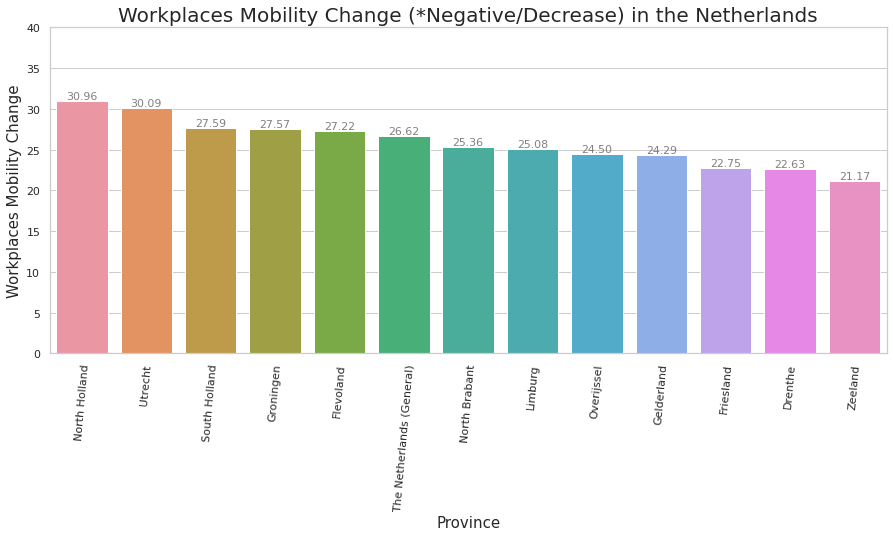

In [37]:
plt.figure(figsize=(15,6))
W1=sns.barplot(x="Province", y="Workplaces", data=result_W)
sns.set(style="whitegrid")
W1.axes.set_title("Workplaces Mobility Change (*Negative/Decrease) in the Netherlands", fontsize=20)
W1.set_xlabel("Province",fontsize=15)
W1.set_ylabel("Workplaces Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in W1.patches:
             W1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = W1.set_ylim(0,40)

## G. Residences

__Mobility trends for places of residence.__

### G.1. The General Trend of Mobility in Residences in the Netherlands 

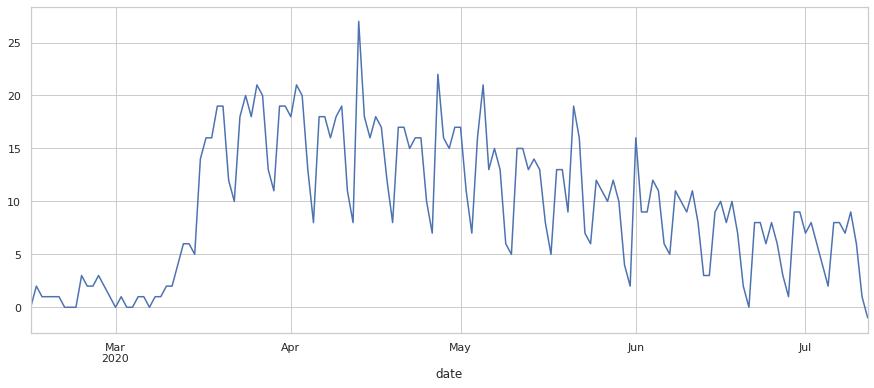

In [38]:
df_NL['Residences'].plot(figsize=(15,6))

### G.2. The Time Series Analysis by Provinces on the Mobility in Residences 

[None, None]

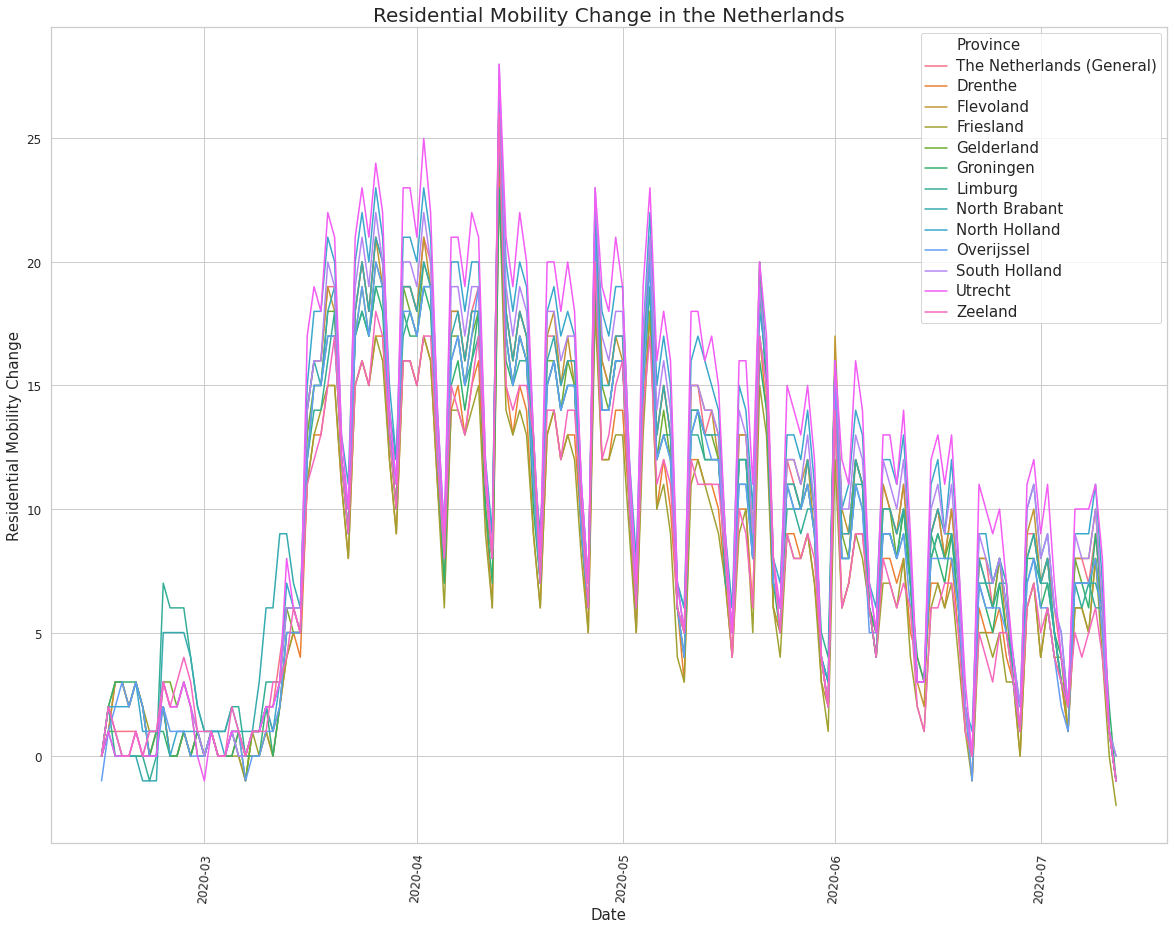

In [39]:
plt.figure(figsize=(20,15))
R=sns.lineplot(x="Date", y="Residences", hue='Province', data=df)
sns.set(style="whitegrid")
R.axes.set_title("Residential Mobility Change in the Netherlands",fontsize=20)
R.set_xlabel("Date",fontsize=15)
R.set_ylabel("Residential Mobility Change",fontsize=15)
R.tick_params(labelsize=12)
plt.xticks(rotation=85)
plt.setp(R.get_legend().get_texts(), fontsize='15')
plt.setp(R.get_legend().get_title(), fontsize='15') 

### G.3. The Percentage Change by Provinces in the Mobility in Residences

In [40]:
result_R= df.groupby(["Province"])['Residences'].aggregate(np.mean).reset_index().sort_values('Residences', ascending=False)
result_R

,Province,Residences
11,Utrecht,11.140940
7,North Holland,10.597315
9,South Holland,10.033557
6,North Brabant,9.677852
10,The Netherlands (General),9.590604
1,Flevoland,9.429530
5,Limburg,9.060403
3,Gelderland,9.053691
8,Overijssel,8.744966
4,Groningen,8.697987


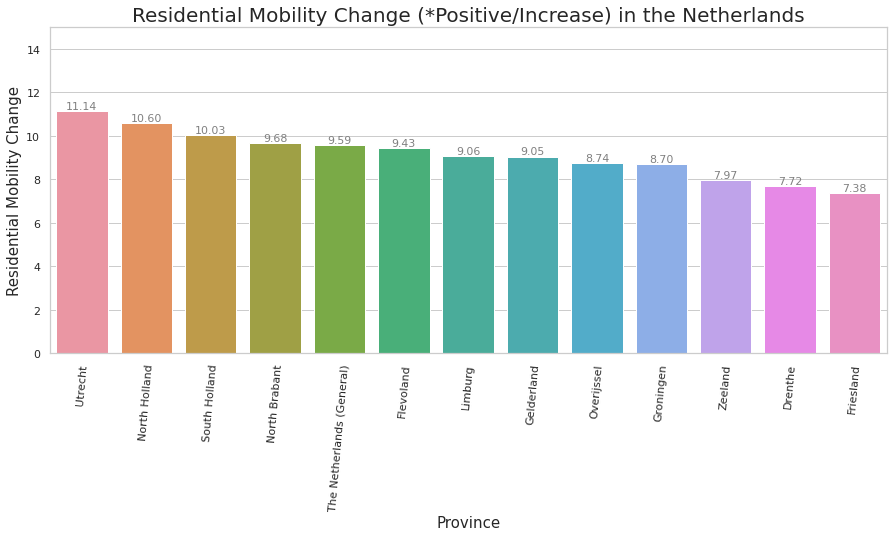

In [41]:
plt.figure(figsize=(15,6))
R1=sns.barplot(x="Province", y="Residences", data=result_R)
sns.set(style="whitegrid")
R1.axes.set_title("Residential Mobility Change (*Positive/Increase) in the Netherlands", fontsize=20)
R1.set_xlabel("Province",fontsize=15)
R1.set_ylabel("Residential Mobility Change",fontsize=15)
plt.xticks(rotation=85)
for p in R1.patches:
             R1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='gray', xytext=(0, 5),
                 textcoords='offset points')
_ = R1.set_ylim(0,15)